In [1]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
len(x_train[0])

500

In [4]:
print(x_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [14]:
len(x_train[0])

500

In [3]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [5]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
#하나의 영화평을 받아서 각 단어들을 128 차원의 vector로 변환한다.
model.add(layers.Conv1D(32, 7, activation='relu')) # filter size => 7x128x1
model.add(layers.MaxPool1D(5)) # filter size => 5x1, stride = 5
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                100384    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 1,409,154
Trainable params: 1,409,154
Non-trainable params: 0
______________________________________________

In [6]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 32ms/step - loss: 0.4498 - acc: 0.7735 - val_loss: 0.2926 - val_acc: 0.8794
Epoch 2/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2298 - acc: 0.9100 - val_loss: 0.2915 - val_acc: 0.8844- loss: 0.2298 - acc:
Epoch 3/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1602 - acc: 0.9402 - val_loss: 0.2933 - val_acc: 0.8874
Epoch 4/10
157/157 [==============================] - 5s 29ms/step - loss: 0.1004 - acc: 0.9661 - val_loss: 0.3181 - val_acc: 0.8916- loss: 0.0 - ETA: 2s - loss: 0.0972 - acc: 0.969 - ETA: 2s - loss: 0.0978 - acc: 0.969 - ETA: 2s  - ETA: 0s - loss: 0.1008 - acc: 0.96 - ETA: 0s - loss: 0.1009 - acc: 0.96
Epoch 5/10
157/157 [==============================] - 5s 30ms/step - loss: 0.0517 - acc: 0.9835 - val_loss: 0.3938 - val_acc: 0.8842 lo - ETA: 1s - loss: - ETA: 0s - loss: 0.0519 - acc: 0.9
Epoch 6/10
157/157 [==============================] - 5s 29ms/step - loss: 0.0238 - a

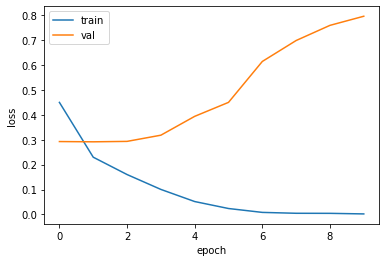

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 17s 22ms/step - loss: 0.3107 - acc: 0.8686


In [16]:
test_acc

0.8686400055885315

## 또 다른 예

In [17]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
#하나의 영화평을 받아서 각 단어들을 128 차원의 vector로 변환한다.
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,308,737
Trainable params: 1,308,737
Non-trainable params: 0
_________________________________________________________________


embedding_3 (Embedding)      (None, 500, 128) => 하나의 영화평이 500단어로 구성, 그리고 각 단어는 128 차원 벡터로 구성

In [18]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [19]:
model.fit(x_train, y_train, epochs=5, batch_size=400)

Epoch 1/5
63/63 [==============================] - 75s 1s/step - loss: 0.6533 - acc: 0.6545
Epoch 2/5
63/63 [==============================] - 84s 1s/step - loss: 0.3810 - acc: 0.8418
Epoch 3/5
63/63 [==============================] - 60s 952ms/step - loss: 0.2714 - acc: 0.9005
Epoch 4/5
63/63 [==============================] - 65s 1s/step - loss: 0.2013 - acc: 0.9363
Epoch 5/5
63/63 [==============================] - 62s 986ms/step - loss: 0.1431 - acc: 0.9602


In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

782/782 [==============================] - 14s 17ms/step - loss: 0.4368 - acc: 0.8805
test_acc: 0.8804799914360046
